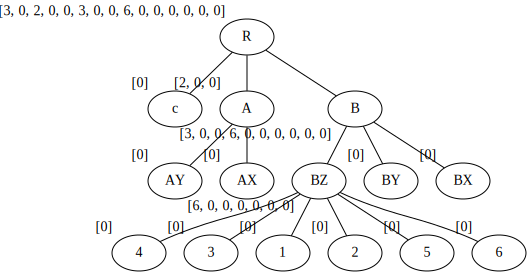

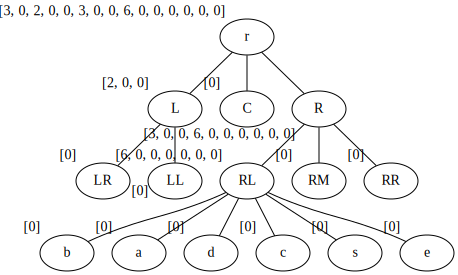

test [3, 0, 2, 0, 0, 3, 0, 0, 6, 0, 0, 0, 0, 0, 0]
iso [3, 0, 2, 0, 0, 3, 0, 0, 6, 0, 0, 0, 0, 0, 0]


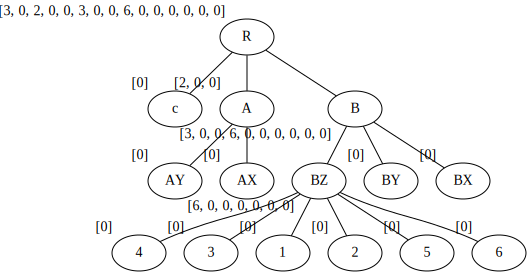

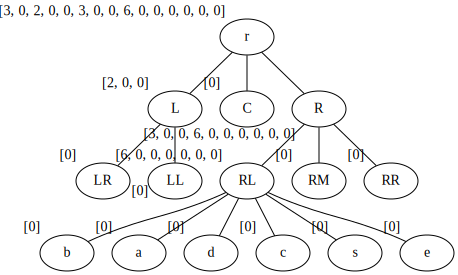

In [1]:
%run tree_isomorphism.py